## Importando bibliotecas e o arquivo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data/Discentes_2013-2019.csv',encoding='latin1')

/home/gustavo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476029 entries, 0 to 2476028
Data columns (total 22 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   AN_BASE                         int64 
 1   NM_GRANDE_AREA_CONHECIMENTO     object
 2   CD_AREA_AVALIACAO               int64 
 3   NM_AREA_AVALIACAO               object
 4   CD_ENTIDADE_CAPES               int64 
 5   SG_ENTIDADE_ENSINO              object
 6   CS_STATUS_JURIDICO              object
 7   DS_DEPENDENCIA_ADMINISTRATIVA   object
 8   CD_PROGRAMA_IES                 object
 9   NM_REGIAO                       object
 10  SG_UF_PROGRAMA                  object
 11  NM_MUNICIPIO_PROGRAMA_IES       object
 12  CD_CONCEITO_PROGRAMA            int64 
 13  NM_PAIS_NACIONALIDADE_DISCENTE  object
 14  DS_TIPO_NACIONALIDADE_DISCENTE  object
 15  TP_SEXO_DISCENTE                object
 16  AN_NASCIMENTO_DISCENTE          int64 
 17  DS_GRAU_ACADEMICO_DISCENTE      object
 18  ST

## Agrupando por PPG

In [4]:
def contar_homem(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_mulher(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(0)
        else:
            L.append(1)
    return L

def contar_brasiliero(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_estrangeiro(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(0)
        else:
            L.append(1)
    return L

def media_especial(array):
    '''Tira a média dos valores do array ignorando-se os zeros.'''
    valores_nao_nulos=[]
    for i in array:
        if i!=0:
            valores_nao_nulos.append(i)
    return np.mean(valores_nao_nulos)

In [5]:
df['Homens']=contar_homem(df.TP_SEXO_DISCENTE)
df['Mulheres']=contar_mulher(df.TP_SEXO_DISCENTE)
df['Brasileiros']=contar_brasiliero(df.DS_TIPO_NACIONALIDADE_DISCENTE)
df['Estrangeiros']=contar_estrangeiro(df.DS_TIPO_NACIONALIDADE_DISCENTE)
df['Quantidade_Discentes']=[1 for i in range(len(df))]

In [6]:
df1=df.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'Homens':np.sum,'Mulheres':np.sum,
                                                              'Brasileiros':np.sum, 'Estrangeiros':np.sum,
                                                             'Quantidade_Discentes':np.sum,
                                                            'QT_MES_TITULACAO':media_especial,
                                                            'CD_AREA_AVALIACAO':np.max,'CS_STATUS_JURIDICO':np.max,
                                                            'AN_NASCIMENTO_DISCENTE':np.mean,'NM_REGIAO':np.max,
                                                            'SG_UF_PROGRAMA':np.max,
                                                            'CD_CONCEITO_PROGRAMA':np.max})


#esse aviso aparece porque tem uns programas que só tem valor zero a coluna QT_MES_TITULACAO
#(zero indica que o progama ainda não foi terminado )

/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
#juntado com os dados de número de docentes

docentes=pd.read_csv('data/Docentes_2013-2019.csv',encoding='latin1')
docentes['Quantidade_Docentes']=[1 for i in range(len(docentes))]
docentes=docentes.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).sum()[['CD_PROGRAMA_IES',
                                                                               'AN_BASE','Quantidade_Docentes']]
df1=pd.merge(df1,docentes,on=['CD_PROGRAMA_IES','AN_BASE'])
df1=df1[['CD_PROGRAMA_IES',
 'AN_BASE',
 'Homens',
 'Mulheres',
 'Brasileiros',
 'Estrangeiros',
 'Quantidade_Discentes',
 'QT_MES_TITULACAO',
 'Quantidade_Docentes',
 'CD_AREA_AVALIACAO',
 'CS_STATUS_JURIDICO',
 'AN_NASCIMENTO_DISCENTE',
 'NM_REGIAO',
 'SG_UF_PROGRAMA',
 'CD_CONCEITO_PROGRAMA']]

/home/gustavo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
para_deletar=[df,docentes]
del para_deletar #esse é um jeito de forçar o garbage collector a remover esses dataframes da memória

In [9]:
def proporcao_homens(df):
    L=[]
    for i in range(len(df)):
        L.append(df.Homens[i]/df.Quantidade_Discentes[i])
    return L

def razao_aluno_tempo(df):
    '''Retorna a razão aluno/tempo médio de titulação'''
    L=[]
    for i in range(len(df)):
        L.append(df.Quantidade_Discentes[i]/df.QT_MES_TITULACAO[i])
    return L

def razao_prof_aluno(df):
    '''Retorna a razão aluno/professor'''
    L=[]
    for i in range(len(df)):
        L.append(df.Quantidade_Discentes[i]/df.Quantidade_Docentes[i])
    return L

In [10]:
df1.insert(4,'Prop_Homens',proporcao_homens(df1),True)
df1.insert(9,'Aluno_Tempo',razao_aluno_tempo(df1),True)
df1.insert(11,'Prof_Aluno',razao_prof_aluno(df1),True)

/home/gustavo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prof_Aluno', ylabel='CD_CONCEITO_PROGRAMA'>

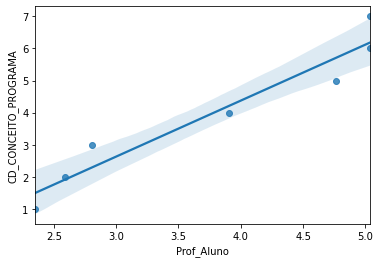

In [11]:
prof_Aluno=df1.groupby('CD_CONCEITO_PROGRAMA').mean()['Prof_Aluno']
nota=df1.groupby('CD_CONCEITO_PROGRAMA').mean().index

sns.regplot(prof_Aluno,nota)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28465 entries, 0 to 28464
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CD_PROGRAMA_IES         28465 non-null  object 
 1   AN_BASE                 28465 non-null  int64  
 2   Homens                  28465 non-null  int64  
 3   Mulheres                28465 non-null  int64  
 4   Prop_Homens             28465 non-null  float64
 5   Brasileiros             28465 non-null  int64  
 6   Estrangeiros            28465 non-null  int64  
 7   Quantidade_Discentes    28465 non-null  int64  
 8   QT_MES_TITULACAO        26134 non-null  float64
 9   Aluno_Tempo             26134 non-null  float64
 10  Quantidade_Docentes     28465 non-null  int64  
 11  Prof_Aluno              28465 non-null  float64
 12  CD_AREA_AVALIACAO       28465 non-null  int64  
 13  CS_STATUS_JURIDICO      28465 non-null  object 
 14  AN_NASCIMENTO_DISCENTE  28465 non-null

## Tentando um ML

### Prevendo a nota de um ano a partir das features do ano anterior

In [13]:
#coisas para fazer o SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [14]:
df1=df1.dropna()
df1=df1[np.logical_and(df1['CD_CONCEITO_PROGRAMA']!=1,df1['CD_CONCEITO_PROGRAMA']!=2)] 
#1 e 2 quase não existem no dataset e poluem a confusionmatrix

In [15]:
#código para dropar qualquer programa o qual não exista em ambos os anos escolhidos
antes,depois=2015,2016

df1=df1.set_index(df1.CD_PROGRAMA_IES)
index=[]
[index.append(x) for x in df1.index if x not in index] #tirando os valor
para_apagar=[]
for i in index:
    lista=list(df1[df1.index==i]['AN_BASE'])
    if antes in lista and depois in lista :
        pass
    else:
        para_apagar.append(i)

df1=df1.drop(para_apagar)

df1_antes=df1[df1.AN_BASE==antes]
df1_depois=df1[df1.AN_BASE==depois]

In [16]:
# separando em treino e teste

x=df1_antes.iloc[:,6:11]
y=df1_depois.iloc[:,17]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.2)

In [17]:
#fazendo tudo em escala 
scaler = StandardScaler().fit(x_treino)
x_treino=scaler.transform(x_treino)
x_teste=scaler.transform(x_teste)

In [18]:
#treinando a máquina 
clf=svm.SVC()
clf.fit(x_treino,y_treino)

#testando o modelo
y_pred=clf.predict(x_teste)
print('Score F1 =',round(f1_score(y_teste,y_pred,average='weighted'),2))
print('Acurácia =',round(accuracy_score(y_teste,y_pred),2))

Score F1 = 0.49
Acurácia = 0.52


Text(0.5, 1.0, 'Confusion Matrix normalizada para os valores previstos')

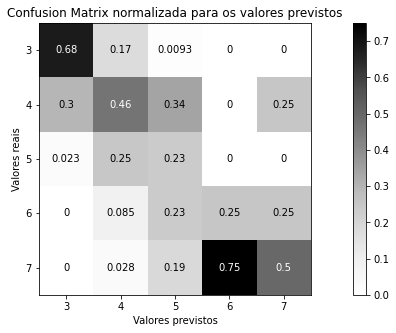

In [19]:
plt.rcParams['figure.figsize'] = (15, 5)
plot_confusion_matrix(clf,x_teste,y_teste,values_format='.2g',normalize='pred',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Confusion Matrix normalizada para os valores previstos')